# The Sparks Foundation

### Task 1: Prediction using Supervised Machine Learning
####  Predict the percentage of an student score based on the number of study hours.

### Sanika Patil

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


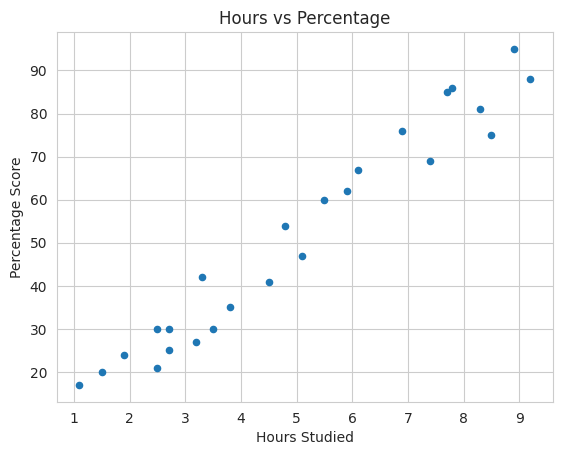

In [ ]:
data.plot(x = 'Hours',y = 'Scores', kind='scatter')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

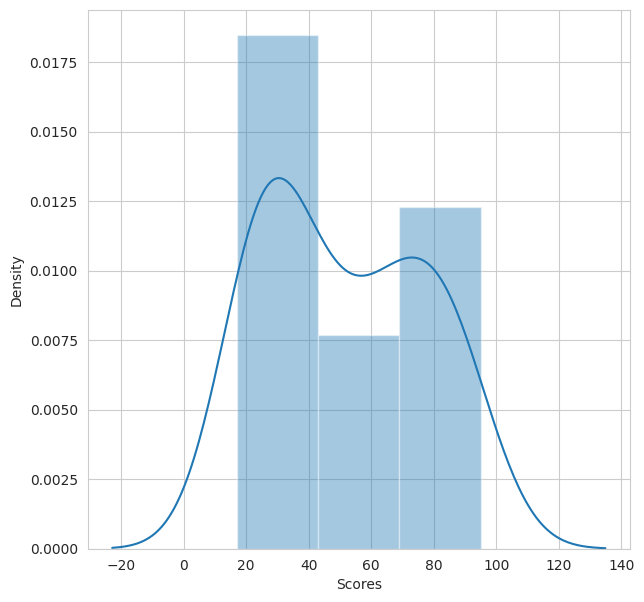

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
sns.distplot(data.Scores)
plt.show()

In [ ]:
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
features = ["Hours"]
X_train = data[features]
X_train.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
target = ["Scores"]
y_train = data[target]
y_train.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [ ]:
y_mean = y_train.mean()
y_mean

Scores    51.48
dtype: float64

In [ ]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[0:5]

In [ ]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt score", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
m=model.coef_
c=model.intercept_
x=data.iloc[:,:-1].values
y =data.iloc[:,1].values
line = m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [ ]:
hours = 9.25
own_pred = model.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

In [ ]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

In [ ]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))